Figure 1 - Probabilistic Graphical Model

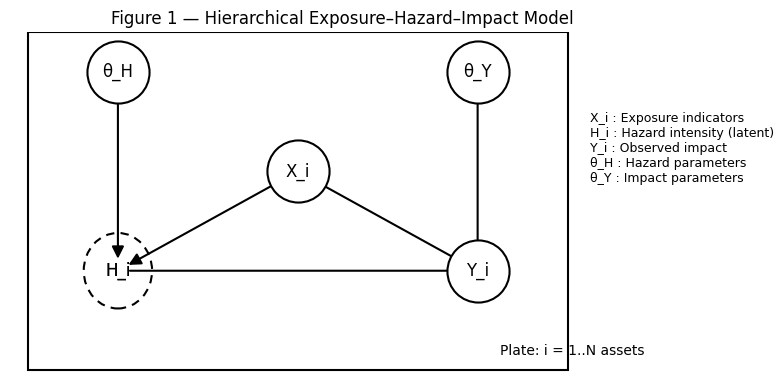

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# --- Graph definition ---
G = nx.DiGraph()

pos = {
    "θ_H": (0, 2),
    "θ_Y": (4, 2),
    "X_i": (2, 1),
    "H_i": (0, 0),
    "Y_i": (4, 0),
}

edges = [
    ("θ_H", "H_i"),
    ("X_i", "H_i"),
    ("H_i", "Y_i"),
    ("X_i", "Y_i"),
    ("θ_Y", "Y_i"),
]

G.add_nodes_from(pos.keys())
G.add_edges_from(edges)

# --- Plot ---
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_facecolor("white")

# Observed + parameter nodes
normal_nodes = ["X_i", "Y_i", "θ_H", "θ_Y"]
nx.draw_networkx_nodes(
    G, pos,
    nodelist=normal_nodes,
    node_size=2000,
    node_color="white",
    edgecolors="black",
    linewidths=1.5,
    ax=ax
)

# Latent node (dashed border) as a patch (so dash actually works reliably)
hx, hy = pos["H_i"]
latent_circle = plt.Circle(
    (hx, hy),
    radius=0.38,
    facecolor="white",
    edgecolor="black",
    linewidth=1.5,
    linestyle=(0, (4, 3))  # dashed
)
ax.add_patch(latent_circle)

# Labels (draw H_i label manually so it sits centered on the patch)
nx.draw_networkx_labels(G, pos, font_size=12, ax=ax)
ax.text(hx, hy, "H_i", ha="center", va="center", fontsize=12)

# Edges
nx.draw_networkx_edges(
    G, pos,
    arrows=True,
    arrowsize=18,
    width=1.5,
    ax=ax
)

# Plate rectangle
plate = plt.Rectangle((-1.0, -1.0), 6.0, 3.4, fill=False, linewidth=1.5)
ax.add_patch(plate)
ax.text(4.25, -0.85, "Plate: i = 1..N assets", fontsize=10)

# Legend text (right)
legend_text = (
    "X_i : Exposure indicators\n"
    "H_i : Hazard intensity (latent)\n"
    "Y_i : Observed impact\n"
    "θ_H : Hazard parameters\n"
    "θ_Y : Impact parameters"
)
ax.text(5.25, 1.6, legend_text, fontsize=9, va="top")

# Limits so nothing clips
ax.set_xlim(-1.2, 6.2)
ax.set_ylim(-1.1, 2.4)

ax.set_title("Figure 1 — Hierarchical Exposure–Hazard–Impact Model", fontsize=12)
ax.axis("off")
plt.tight_layout()
plt.show()

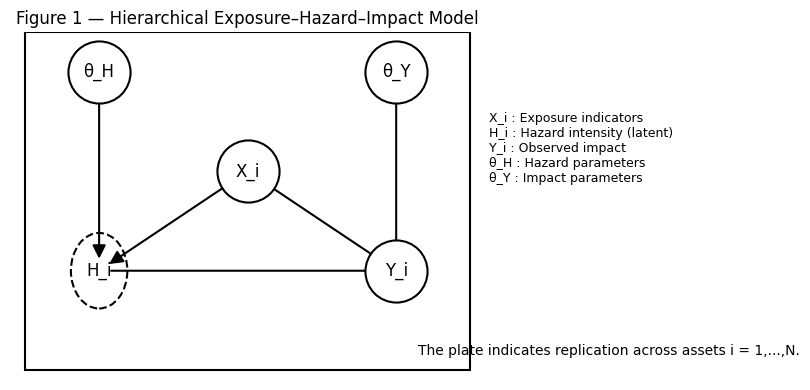

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

nodes = {
    "θ_H": (0, 2),
    "θ_Y": (4, 2),
    "X_i": (2, 1),
    "H_i": (0, 0),
    "Y_i": (4, 0),
}

G.add_nodes_from(nodes.keys())

edges = [
    ("θ_H", "H_i"),
    ("X_i", "H_i"),
    ("H_i", "Y_i"),
    ("X_i", "Y_i"),
    ("θ_Y", "Y_i"),
]

G.add_edges_from(edges)

pos = nodes

fig, ax = plt.subplots(figsize=(8,4))
ax.set_facecolor("white")

# Observed + parameter nodes
normal_nodes = ["X_i", "Y_i", "θ_H", "θ_Y"]

nx.draw_networkx_nodes(
    G, pos,
    nodelist=normal_nodes,
    node_size=2000,
    node_color="white",
    edgecolors="black",
    linewidths=1.5
)

# Latent node (dashed border)
x, y = pos["H_i"]
circle = plt.Circle(
    (x, y),
    radius=0.38,
    facecolor="white",
    edgecolor="black",
    linewidth=1.5,
    linestyle="dashed"
)
ax.add_patch(circle)

# Labels
nx.draw_networkx_labels(G, pos, font_size=12)

# Edges
nx.draw_networkx_edges(
    G, pos,
    arrows=True,
    arrowsize=20,
    width=1.5
)

# Plate
plate = plt.Rectangle((-1.0, -1.0), 6.0, 3.4, fill=False, linewidth=1.5)
ax.add_patch(plate)
ax.text(4.3, -0.85, "The plate indicates replication across assets i = 1,...,N.", fontsize=10)

# Expanded axis limits (prevents clipping)
ax.set_xlim(-1.2, 5.2)
ax.set_ylim(-1.1, 2.4)

# Symbol legend (right side, subtle)
legend_text = (
    "X_i : Exposure indicators\n"
    "H_i : Hazard intensity (latent)\n"
    "Y_i : Observed impact\n"
    "θ_H : Hazard parameters\n"
    "θ_Y : Impact parameters"
)

ax.text(5.25, 1.6, legend_text, fontsize=9, va="top")

plt.title("Figure 1 — Hierarchical Exposure–Hazard–Impact Model", fontsize=12)
plt.axis("off")
plt.tight_layout()
plt.show()

Figure 2 - Posterior Decision Stability (Synthetic Illustration)

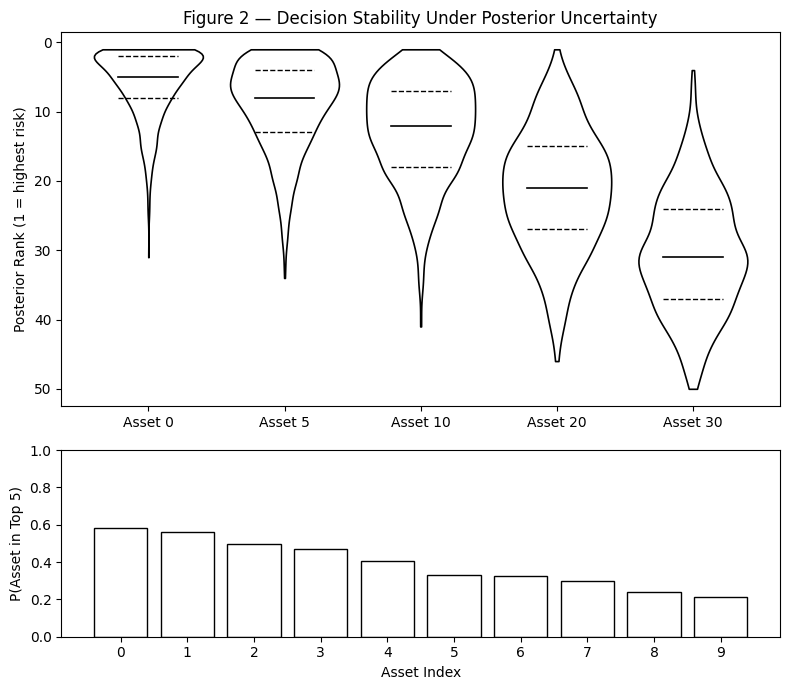

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Figure 2 — Decision Stability Under Posterior Uncertainty (Illustrative)
# -----------------------------

np.random.seed(42)

# Settings
n_assets = 50
n_draws = 1000
selected_assets = [0, 5, 10, 20, 30]
k = 5  # top-k threshold

# Simulated "true" mean risk per asset (higher = riskier)
true_means = np.linspace(1.0, 0.2, n_assets)

# Posterior samples of "risk" (assets x draws)
posterior_samples = np.random.normal(
    loc=true_means[:, None],
    scale=0.15,
    size=(n_assets, n_draws)
)

# Compute ranks per draw (1 = highest risk)
# ranks[i, m] = rank of asset i in draw m
ranks = np.argsort(np.argsort(-posterior_samples, axis=0), axis=0) + 1

# Top-k membership probabilities for all assets
topk_prob = (ranks <= k).mean(axis=1)

# Build data for violin plot (rank distributions for selected assets)
rank_data = [ranks[i, :] for i in selected_assets]

# -----------------------------
# Plot
# -----------------------------
fig, axes = plt.subplots(
    2, 1, figsize=(8, 7),
    gridspec_kw={"height_ratios": [2, 1]}
)

# --- (A) Posterior rank distributions (violins) ---
vp = axes[0].violinplot(
    dataset=rank_data,
    showmeans=False,
    showmedians=False,   # we draw median + quartiles manually
    showextrema=False,
    widths=0.8
)

# Style violins: white fill, black outline
for body in vp["bodies"]:
    body.set_facecolor("white")
    body.set_edgecolor("black")
    body.set_linewidth(1.2)
    body.set_alpha(1.0)

# Add median and quartiles manually (to match your figure)
for i, vals in enumerate(rank_data, start=1):
    q1, med, q3 = np.percentile(vals, [25, 50, 75])
    axes[0].plot([i - 0.22, i + 0.22], [med, med], color="black", linewidth=1.2)
    axes[0].plot([i - 0.22, i + 0.22], [q1, q1], color="black", linewidth=1.0, linestyle="--")
    axes[0].plot([i - 0.22, i + 0.22], [q3, q3], color="black", linewidth=1.0, linestyle="--")

axes[0].set_xticks(range(1, len(selected_assets) + 1))
axes[0].set_xticklabels([f"Asset {a}" for a in selected_assets])
axes[0].invert_yaxis()
axes[0].set_ylabel("Posterior Rank (1 = highest risk)")
axes[0].set_title("Figure 2 — Decision Stability Under Posterior Uncertainty")

# --- (B) Top-k membership probabilities (bars) ---
idx = np.arange(10)
axes[1].bar(idx, topk_prob[:10], color="white", edgecolor="black")
axes[1].set_ylabel(f"P(Asset in Top {k})")
axes[1].set_xlabel("Asset Index")
axes[1].set_xticks(idx)
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

Figure 3 - Domain Shift Stress Test (Synthetic Illustration)

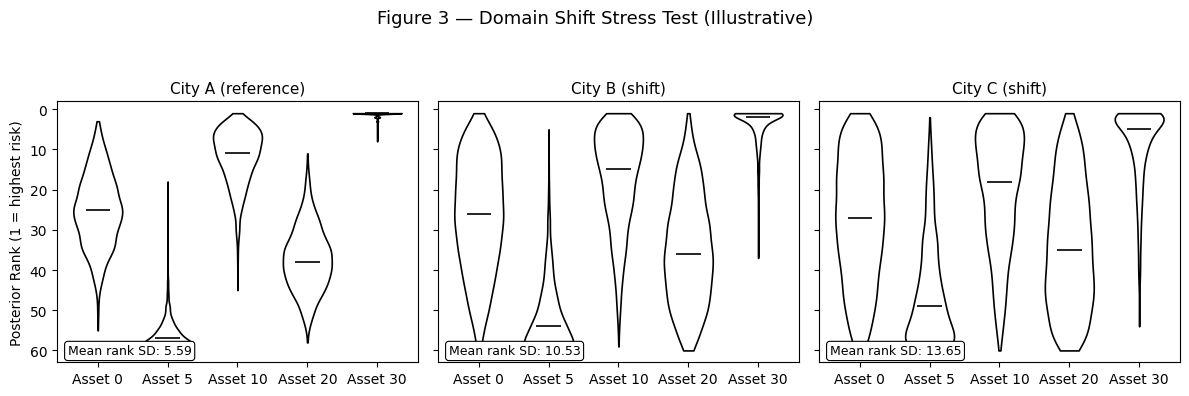

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Figure 3 — Domain Shift Stress Test (Illustrative)
# -----------------------------

rng = np.random.default_rng(42)

# Settings
N = 60                  # total assets
n_draws = 2000          # posterior draws (synthetic)
asset_subset = [0, 5, 10, 20, 30]

cities = [
    ("City A (reference)", 0.35),
    ("City B (shift)",     0.75),
    ("City C (shift)",     1.25),
]

# Base latent "risk" per asset (fixed across cities)
base_risk = rng.normal(loc=0.0, scale=1.0, size=N)

def simulate_ranks(base_risk: np.ndarray, sigma: float, n_draws: int, rng: np.random.Generator) -> np.ndarray:
    """
    Simulate posterior-like risk draws and convert them into ranks per draw.
    Returns ranks with shape (N, n_draws), where 1 = highest risk.
    """
    N = base_risk.size
    noise = rng.normal(loc=0.0, scale=sigma, size=(n_draws, N))
    risk_draws = base_risk[None, :] + noise  # (n_draws, N)

    order = np.argsort(-risk_draws, axis=1)  # descending risk (higher = riskier)
    ranks = np.empty_like(order, dtype=int)
    ranks[np.arange(n_draws)[:, None], order] = np.arange(1, N + 1)[None, :]
    return ranks.T  # (N, n_draws)

# Simulate ranks per city + compute subset stability metric
city_ranks = {}
city_stats = {}

for city_name, sigma in cities:
    ranks = simulate_ranks(base_risk, sigma, n_draws, rng)
    city_ranks[city_name] = ranks

    # Mean SD of ranks across posterior draws, computed on the shown subset
    subset_sd = ranks[asset_subset, :].std(axis=1)  # SD per asset
    city_stats[city_name] = subset_sd.mean()

# Plot
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for ax, (city_name, _) in zip(axes, cities):
    ranks = city_ranks[city_name]
    data = [ranks[i, :] for i in asset_subset]

    parts = ax.violinplot(
        dataset=data,
        showmeans=False,
        showmedians=True,
        showextrema=False,
        widths=0.7
    )

    # Styling: white fill, black outline
    for body in parts["bodies"]:
        body.set_facecolor("white")
        body.set_edgecolor("black")
        body.set_linewidth(1.2)
        body.set_alpha(1.0)

    parts["cmedians"].set_color("black")
    parts["cmedians"].set_linewidth(1.2)

    ax.set_title(city_name, fontsize=11)
    ax.set_xticks(range(1, len(asset_subset) + 1))
    ax.set_xticklabels([f"Asset {i}" for i in asset_subset])

    ax.invert_yaxis()
    ax.grid(False)

    # Stability metric annotation
    ax.text(
        0.03, 0.03,
        f"Mean rank SD: {city_stats[city_name]:.2f}",
        transform=ax.transAxes,
        fontsize=9,
        bbox=dict(
            boxstyle="round,pad=0.25",
            facecolor="white",
            edgecolor="black",
            linewidth=0.8
        )
    )

axes[0].set_ylabel("Posterior Rank (1 = highest risk)")

fig.suptitle("Figure 3 — Domain Shift Stress Test (Illustrative)", fontsize=13)
fig.tight_layout(rect=[0, 0, 1, 0.92])

plt.show()